<a href="https://colab.research.google.com/github/jplineb/FASTWASON/blob/master/FAST_Ultrasound_usingFASTAI_attempt2_CustomClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *

In [0]:
bs = 64

In [0]:
import os

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Looking at data

In [0]:
classes = ['Quality1', 'Quality2', 'Quality3', 'Quality4', 'Quality5']

path = Path('/content/gdrive/My Drive/FASTAI /datafolder')
            

In [0]:
# for c in classes:
#   print(c)
#   verify_images(path/c)

In [0]:
np.random.seed(42)

data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(max_zoom=0, max_warp = None), size=224, bs=bs).normalize(imagenet_stats)

In [0]:
data.classes

['Quality1', 'Quality2', 'Quality3', 'Quality4', 'Quality5']

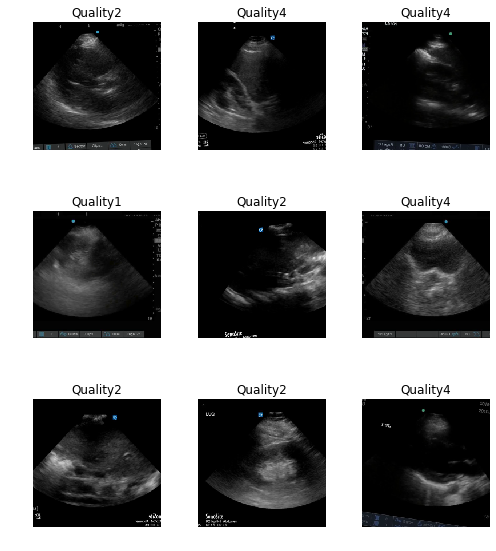

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.901930,1.402271,0.589147,00:34
1,1.626390,1.349405,0.546512,00:36
2,1.488246,1.249040,0.480620,00:34
3,1.381634,1.182863,0.480620,00:35


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


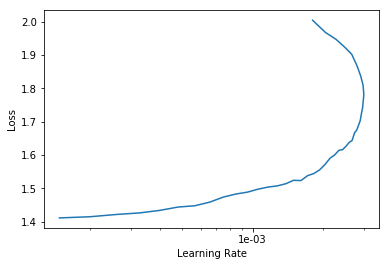

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(12, max_lr=slice(2e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.767934,1.399945,0.616279,00:36
1,1.792384,1.401959,0.627907,00:36
2,1.782844,1.388884,0.639535,00:35
3,1.786384,1.430783,0.631783,00:36
4,1.778238,1.489067,0.655039,00:35
5,1.739462,1.443863,0.639535,00:36
6,1.719084,1.437362,0.670543,00:35
7,1.678270,1.424603,0.666667,00:36
8,1.675441,1.397571,0.627907,00:35
9,1.652167,1.368832,0.647287,00:36


In [0]:
learn.save('stage-2')

##Interperation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1017 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Quality2,Quality2,Quality2,Quality2,Quality2
Path: /content/gdrive/My Drive/FASTAI /datafolder;

Valid: LabelList (258 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Quality5,Quality5,Quality5,Quality5,Quality5
Path: /content/gdrive/My Drive/FASTAI /datafolder;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), b

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

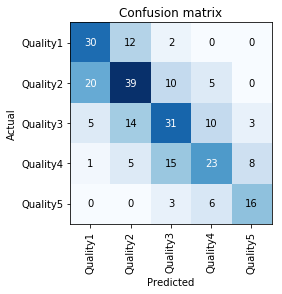

In [0]:
interp.plot_confusion_matrix()

## pretrained = False

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.960854,1.678277,0.720930,00:33
1,1.792517,2.394103,0.798450,00:34
2,1.675254,2.189669,0.779070,00:33
3,1.569772,1.242619,0.600775,00:35
4,1.488903,1.216180,0.589147,00:34
5,1.419680,1.185712,0.554264,00:34


In [0]:
learn.save('stage-3')

In [0]:
learn.unfreeze

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


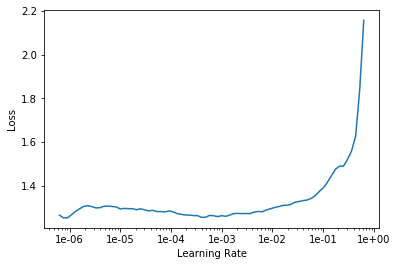

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, max_lr=slice(9e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.234391,1.159329,0.500000,00:36
1,1.222631,1.196335,0.550388,00:34
2,1.221786,1.242235,0.534884,00:33
3,1.202877,1.171400,0.500000,00:35
4,1.165339,1.091531,0.488372,00:34
5,1.119277,1.046361,0.453488,00:35


In [0]:
learn.fit_one_cycle(6, max_lr=slice(9e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.988994,1.225996,0.593023,00:33
1,1.037201,1.264252,0.581395,00:35
2,1.062297,1.906263,0.631783,00:35
3,1.042336,2.166804,0.682171,00:36
4,0.997965,1.077481,0.484496,00:34
5,0.948921,1.078435,0.465116,00:35


In [0]:
learn.fit_one_cycle(12, max_lr=slice(9e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.838880,1.081187,0.465116,00:35
1,0.828760,1.081984,0.480620,00:35
2,0.836376,1.388891,0.546512,00:36
3,0.882275,1.803433,0.554264,00:35
4,0.912265,1.824906,0.612403,00:36
5,0.891430,2.017700,0.593023,00:35
6,0.864323,1.238144,0.511628,00:35
7,0.817756,1.418798,0.550388,00:35
8,0.752984,1.285546,0.515504,00:34
9,0.702833,1.288386,0.503876,00:35


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


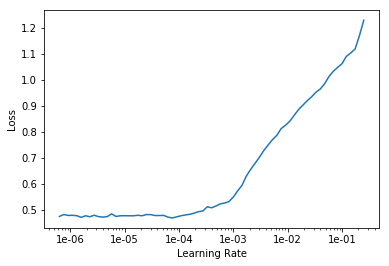

In [0]:
learn.recorder.plot()

Min numerical gradient: 6.31E-05


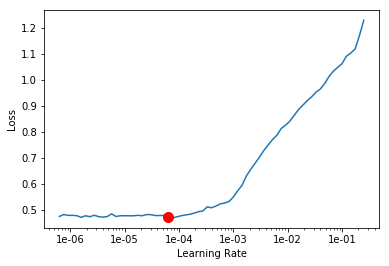

In [0]:
learn.recorder.plot(suggestion = True)

In [0]:
learn.lr_find(stop_div=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-05


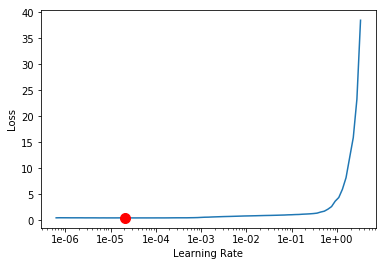

In [0]:
learn.recorder.plot(suggestion = True)

In [0]:
learn.fit_one_cycle(12, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.493811,1.287873,0.468992,00:35
1,0.482702,1.339016,0.500000,00:34
2,0.465419,1.361977,0.488372,00:33
3,0.468890,1.461532,0.496124,00:34
4,0.463896,1.473665,0.496124,00:33
5,0.463093,1.482915,0.496124,00:34
6,0.446978,1.499157,0.488372,00:33
7,0.438446,1.505053,0.500000,00:34
8,0.419302,1.553305,0.503876,00:34
9,0.407267,1.558206,0.496124,00:34


In [0]:
learn.unfreeze()




In [0]:
learn.fit_one_cycle(30, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.368851,1.566889,0.500000,00:36
1,0.365079,1.556910,0.503876,00:34
2,0.356383,1.580751,0.500000,00:34
3,0.365644,1.621778,0.515504,00:35
4,0.361832,1.662591,0.492248,00:34
5,0.355336,1.658555,0.503876,00:36
6,0.350899,1.704206,0.527132,00:35
7,0.355117,2.044321,0.496124,00:35
8,0.356579,1.735873,0.488372,00:34
9,0.355928,2.142158,0.511628,00:35


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

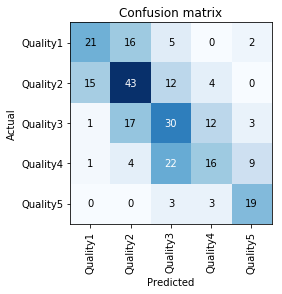

In [0]:
interp.plot_confusion_matrix()